In [1]:
import torch
from torch.autograd import grad
import numpy as np
from GRPytorch_metrics import schwarchild_metric
Mass = 1000

coordinates = [1000.0,3*Mass,np.pi/2,0.0] #t,r,theta,phi

coords = torch.tensor(coordinates,requires_grad=True)



This notebook compares the symbolic result from EinsteinPy to the 

In [3]:
from GRPytorch_models import SpaceTimeMetricModule
from GRPytorch_metrics import schwarchild_metric

schwar_metric_function = lambda x: schwarchild_metric(x,Mass=Mass)
schwar_module = SpaceTimeMetricModule(schwar_metric_function)

In [4]:
import sympy
from sympy import simplify
from einsteinpy.symbolic import RiemannCurvatureTensor
from einsteinpy.symbolic.predefined import Schwarzschild, DeSitter, AntiDeSitter, Minkowski, find

sympy.init_printing()  # for pretty printing

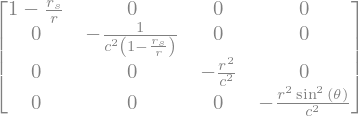

In [5]:
sch = Schwarzschild()
sch.tensor()

In [6]:
rieman_symbolic = RiemannCurvatureTensor.from_metric(sch)

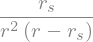

In [7]:
rieman_symbolic.tensor()[0,1,0,1]

In [8]:
# Copy over the symbolic result

rs = (2*Mass)

Rieman0101 = lambda r : rs/(r*r*(r-rs))


In [9]:
import numpy as np
# Get the r-values from 2.1* M to 6.0*M

num_points = 1000
rvalues = np.linspace(2.1*Mass, 6.0*Mass, num_points)

analytic_R0101_result = [Rieman0101(r) for r in rvalues]

In [10]:
# Create a riemann module
from GRPytorch_models import RiemannTensor

riemann_module = RiemannTensor(schwar_module)

In [11]:
# Compute the Rieman tensor on [0,r,\pi/2,0] for all the r-values

coords = [[0.0,r,np.pi/2.0,0.0] for r in rvalues]

riemann_tensor_evaluation = riemann_module(torch.tensor(coords))

In [12]:
# Get R^{0}_{1,0,1}

grpytorcR0101 = []

for coord_ind in range(riemann_tensor_evaluation.size()[0]):
    grpytorcR0101.append(riemann_tensor_evaluation[coord_ind,0,1,0,1])

Text(0, 0.5, 'Rieman0101')

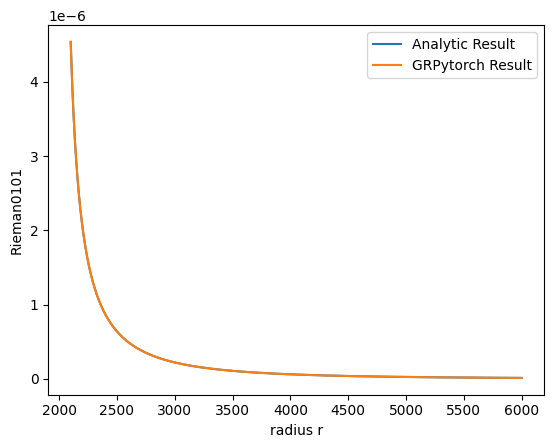

In [13]:
# Plot the analytic and automatic differentiation result
import matplotlib.pyplot as plt

plt.plot(rvalues,analytic_R0101_result,label='Analytic Result')
plt.plot(rvalues,grpytorcR0101,label='GRPytorch Result')
plt.legend()
plt.xlabel('radius r')
plt.ylabel('Rieman0101')


/tmp/ipykernel_21184/3406501907.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1)


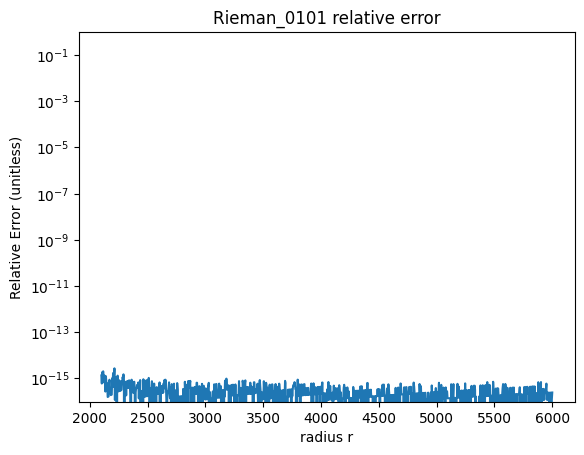

In [19]:
# Plot the error since it's hard to see a difference

import matplotlib.pyplot as plt

plt.plot(rvalues,np.abs(np.array(analytic_R0101_result) - np.array(grpytorcR0101))/np.abs(analytic_R0101_result))
plt.title('Rieman_0101 relative error')
plt.xlabel('radius r')
plt.ylabel('Relative Error (unitless)')
plt.yscale('log')
plt.ylim(0,1)

In [ ]:
# Error within machine precision